In [23]:
import pyvisa
import time
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./nikhils_plot_style.mplstyle')

rm = pyvisa.ResourceManager()

print(rm.list_resources())

('USB0::0x2A8D::0x038B::CN60150271::INSTR',)


In [3]:
scope = rm.open_resource('USB0::0x2A8D::0x038B::CN60150271::INSTR')

print(scope.query('*IDN?'))

KEYSIGHT TECHNOLOGIES,EDUX1052A,CN60150271,02.12.2021071625



In [167]:
time_per_div = 1e-2 # s
volt_per_div = 5e-2 # V
total_time_divs = 10
total_volt_divs = 8
string_to_remove = '#800699999'
# string_to_remove = '#800458751'
# string_to_remove = '#800917503'


scope.write(':CHANnel1:PROBe 1.0') # probe attenuation factor is 1:1
scope.write(f':TIMebase:RANGe {time_per_div*total_time_divs}') # 1000ms total acquisition time
scope.write(f':CHANnel1:RANGe {volt_per_div*total_volt_divs}') # 400mV full scale
scope.write(':CHANnel1:COUPling DC')
scope.write(':TRIGger:MODE EDGE')
scope.write(':SYSTem:HEADer OFF')
# scope.write(':ACQuire:POINts:ANALog 100000')

scope.write(':STOP')

# scope.write(':DIGitize CHANnel1')

# scope.write(':STORe:WAVeform CHANnel1,WMEMory1')
# scope.write(':TRIGger:FORCe')

# scope.write(':WAVeform:STReaming OFF')
scope.write(':WAVeform:SOURce CHANnel1')
# scope.write(':WAVeform:POINts:MODE RAW')
# scope.write(':WAVeform:SOURce WMEMory1')
scope.write(':WAVeform:FORMat ASCII')
# scope.write(':STOP')
scope.write(':SINGLE')
scope.write(':WAVeform:DATA?')



data = scope.read()
data = data.replace(string_to_remove, '')
# data0 = data.split(',')[0].split(' ')[1]
# print(data.split(',')[0].split(' ')[0])

data = [float(x) for x in data.split(',')]
# data.insert(0, float(data0))
data = np.asarray(data)
print(data.shape)
time = np.linspace(0, time_per_div*total_time_divs, len(data))


(50000,)


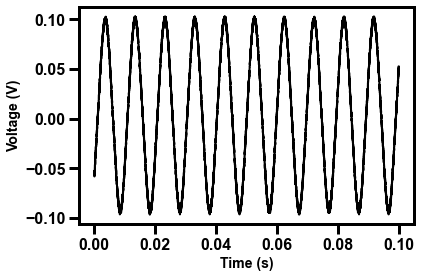

In [168]:
plt.plot(time,data)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.show()

In [163]:
scope.query('waveform:points?')

'+50000\n'

In [112]:
scope.query(':ACQuire:MODE?')

'RTIM\n'